In [63]:
import numpy as np
import pandas as pd
import os

# Load data
path = os.getcwd() + '/Data/Model_V1/Data/'

data_gem = pd.read_pickle(path + 'Gemeenten.pkl')
data_gem_id = pd.read_pickle(path +'GemeentenID.pkl')
data_pos = np.load(path + 'Positions.npy')

path = os.getcwd() + '/Data/Model_V1/Data/High/Seed_7/'

data_people = pd.read_pickle(path + 'PeopleDF.pkl')

data_phases = pd.read_pickle(path + 'Runs_schoolearly/Phases_0.pkl')
data_status = np.load(path + 'Runs_schoolearly/Status_0.npz')
data_timestep = np.loadtxt(path + 'Runs_schoolearly/Timestep_0')

# Data info
print('gem: ', data_gem.shape)
print('gem_id: ', data_gem_id.shape)
print('pos: ',data_pos.shape)
print('people: ',data_people.shape)
print(data_status.files)

# timesteps: n_days * 24
print('timesteps: ', data_status['indptr'].shape)
print('status: ', data_status['data'].shape)

gem:  (380, 1)
gem_id:  (380, 1)
pos:  (7, 24, 170721)
people:  (170721, 382)
['indices', 'indptr', 'format', 'shape', 'data']
timesteps:  (337,)
status:  (1872310,)


In [65]:
# Compute infected cases per timestep
timesteps = data_status['indptr'].shape[0] -1
infected = []
data = data_status['data']
indptr = data_status['indptr']

for t in range(0, timesteps):
    timestamp_row = data[indptr[t] : indptr[t + 1]]
    infected_count = np.count_nonzero(timestamp_row == 2)
    infected.append(infected_count)

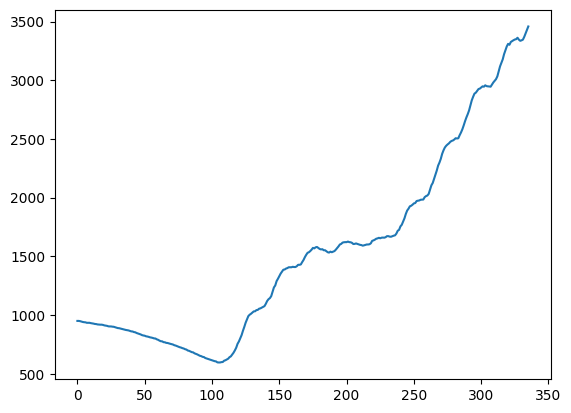

In [53]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, timesteps), infected)